In [1]:
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import df_shrink
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import make_pipeline
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Capstone/TON_IOT_pre.unknown")

In [3]:
print(df.shape)
df.head()

(1210789, 20)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [4]:
over_sampler = ADASYN()

In [5]:
df.drop(columns='Attack', inplace=True)

In [6]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,192,168,1,6,239,255,255,250


In [7]:
df.shape

(1210789, 19)

In [8]:
X = df.drop(columns='Label')
y = df['Label']

In [9]:
X, y = over_sampler.fit_resample(X, y)

In [10]:
print(X.shape)
print(y.shape)

(1995626, 18)
(1995626,)


# New Section

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210789 entries, 0 to 1210788
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1210789 non-null  int64  
 1   L4_DST_PORT                 1210789 non-null  int64  
 2   PROTOCOL                    1210789 non-null  int64  
 3   L7_PROTO                    1210789 non-null  float64
 4   IN_BYTES                    1210789 non-null  int64  
 5   OUT_BYTES                   1210789 non-null  int64  
 6   IN_PKTS                     1210789 non-null  int64  
 7   OUT_PKTS                    1210789 non-null  int64  
 8   TCP_FLAGS                   1210789 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  1210789 non-null  int64  
 10  Label                       1210789 non-null  int64  
 11  IPV4_SRC_ADDR_0             1210789 non-null  int64  
 12  IPV4_SRC_ADDR_1             1210789 non-null  int64  
 1

In [12]:
X = df.drop(columns='Label')
y = df['Label']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
model = LogisticRegression(max_iter=1000)

In [15]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [16]:
test_predictions = model.predict(X_test)
test_predictions

array([1, 1, 1, ..., 1, 0, 1])

In [17]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     53054
           1       1.00      1.00      1.00    249644

    accuracy                           1.00    302698
   macro avg       1.00      0.99      1.00    302698
weighted avg       1.00      1.00      1.00    302698



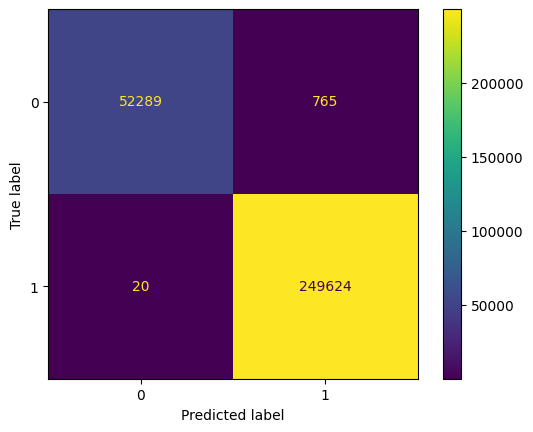

In [18]:
ConfusionMatrixDisplay.from_estimator(model,X_test,Y_test);

In [22]:
with open('log_bianry_adasyn.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
pipe2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=0)
)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [ ]:
params = {
    'randomforestclassifier__n_estimators' : n_estimators ,
    'randomforestclassifier__max_features' : max_features ,
    'randomforestclassifier__max_depth' : max_depth ,
    'randomforestclassifier__min_samples_split' : min_samples_split
}

In [ ]:
rf_random = RandomizedSearchCV(
    pipe2,
    params,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [ ]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=0))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              13,
                                                                              21,
                                                                              30],
                                        'randomforestclassifier__max_features': ['auto',
                                                                                 'sqrt'],
                                        'randomforestclassifier__min_samples_split': [5,
                                                                                      10,
                                                                                      15,
                                                                                      100],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 320,
                                                                                 540,
                                                                                 760,
                                                                                 980,
                                                                                 1200]},
                   verbose=1)

In [ ]:
preds = model.predict(X_test)

In [ ]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     53054
           1       1.00      1.00      1.00    249644

    accuracy                           1.00    302698
   macro avg       1.00      0.99      1.00    302698
weighted avg       1.00      1.00      1.00    302698



In [ ]:
rf_random.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=13, max_features='auto',
                                        min_samples_split=15, n_estimators=760,
                                        random_state=0))])

In [ ]:
rf_final_model = rf_random.best_estimator_

In [ ]:
with open("rf_binary_adasyn.pkl","wb") as f:
    pickle.dump(rf_final_model, f)

In [ ]:
clf = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [ ]:
params = {
    "gradientboostingclassifier__n_estimators":range(20,31,5),
    "gradientboostingclassifier__max_depth":range(2,5)
}
params

{'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [ ]:
xg_model = RandomizedSearchCV(
    clf,
    params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
xg_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'gradientboostingclassifier__max_depth': range(2, 5),
                                        'gradientboostingclassifier__n_estimators': range(20, 31, 5)},
                   verbose=1)

In [ ]:
xg_final_model = xg_model.best_estimator_

In [ ]:
xg_model.score(X_train, Y_train)

0.9997555311086664

In [ ]:
with open("xg_binary_adasyn.pkl","wb") as f:
    pickle.dump(xg_final_model, f)